In [1]:
# Data Profiling Techniques Examples

# 1. Descriptive Statistics:
# Task 1: Calculate the mean, median, and mode for sales figures in a retail dataset.
# Task 2: Analyze the average age, median, and mode in a customer demographic
# dataset.
# Task 3: Determine the mean, median, and mode of daily website visit counts.






# 2. Distribution Analysis:
# Task 1: Visualize the distribution of product prices using histograms.
# Task 2: Create a distribution chart for exam scores in an educational dataset.
# Task 3: Analyze the distribution of order quantities for inventory management.






# 3. Data Type Validation:
# Task 1: Validate numeric fields in a dataset to ensure they contain only numbers.
# Task 2: Check for valid date formats in a transaction log.
# Task 3: Validate email formats in a customer contact dataset.










Descriptive stats for Retail Sales:
Mean: 287.5
Median: 300.0
Mode: 300

Descriptive stats for Customer Age:
Mean: 28.0
Median: 27.5
Mode: 30

Descriptive stats for Website Visits:
Mean: 130.0
Median: 125.0
Mode: 100


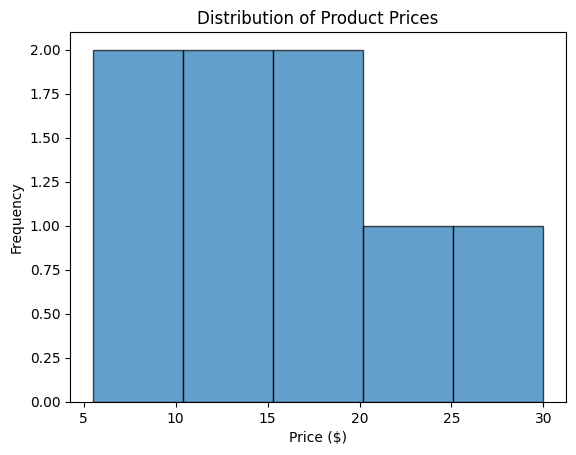

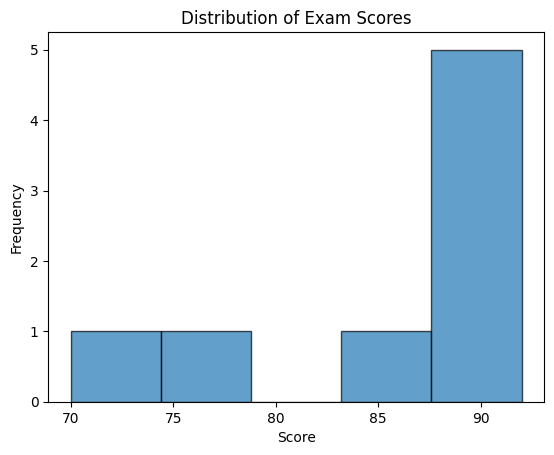

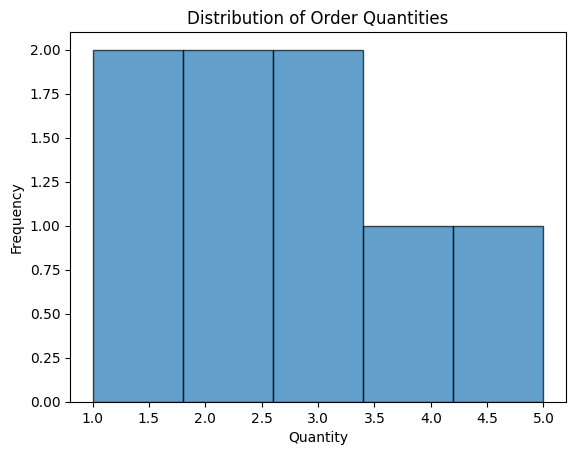


All values in 'Retail Sales' are numeric: True

Date validity check (True = valid, False = invalid):
         Date  IsValid
0  2023-01-01     True
1  2023-02-30    False
2  2023-03-15     True
3  2023-04-10     True

Email validity check (True = valid, False = invalid):
               Email  IsValid
0  alice@example.com     True
1    bob#example.com    False
2  carol@example.com     True
3       dave@example    False


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from statistics import mode, StatisticsError

# ------------------------
# Sample Datasets Creation
# ------------------------

# Retail sales dataset
retail_data = {'Sales': [250, 300, 150, 400, 350, 300, 250, 300]}
df_retail = pd.DataFrame(retail_data)

# Customer demographics dataset
customer_data = {'Age': [25, 30, 22, 40, 30, 22, 25, 30]}
df_customer = pd.DataFrame(customer_data)

# Website visits dataset
website_visits = {'Visits': [100, 150, 120, 130, 170, 120, 150, 100]}
df_visits = pd.DataFrame(website_visits)

# Product prices dataset
product_prices = {'Price': [10.99, 5.49, 20.00, 15.75, 10.99, 5.49, 25.00, 30.00]}
df_prices = pd.DataFrame(product_prices)

# Exam scores dataset
exam_scores = {'Score': [88, 92, 75, 90, 85, 92, 88, 70]}
df_scores = pd.DataFrame(exam_scores)

# Order quantities dataset
order_quantities = {'Quantity': [1, 3, 2, 5, 3, 2, 1, 4]}
df_orders = pd.DataFrame(order_quantities)

# Transaction log dataset with date strings
transaction_log = {'TransactionDate': ['2023-01-01', '2023-02-30', '2023-03-15', '2023-04-10']}
df_transactions = pd.DataFrame(transaction_log)

# Customer contacts dataset with emails
customer_contacts = {'Email': ['alice@example.com', 'bob#example.com', 'carol@example.com', 'dave@example']}
df_contacts = pd.DataFrame(customer_contacts)

# ------------------------
# 1. Descriptive Statistics
# ------------------------

def descriptive_stats(series, name):
    print(f"\nDescriptive stats for {name}:")
    print(f"Mean: {series.mean()}")
    print(f"Median: {series.median()}")
    try:
        m = mode(series)
    except StatisticsError:
        m = "No unique mode"
    print(f"Mode: {m}")

descriptive_stats(df_retail['Sales'], 'Retail Sales')
descriptive_stats(df_customer['Age'], 'Customer Age')
descriptive_stats(df_visits['Visits'], 'Website Visits')

# ------------------------
# 2. Distribution Analysis
# ------------------------

def plot_histogram(series, title, xlabel):
    plt.hist(series, bins=5, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(df_prices['Price'], 'Distribution of Product Prices', 'Price ($)')
plot_histogram(df_scores['Score'], 'Distribution of Exam Scores', 'Score')
plot_histogram(df_orders['Quantity'], 'Distribution of Order Quantities', 'Quantity')

# ------------------------
# 3. Data Type Validation
# ------------------------

# Task 1: Validate numeric fields (check if all values in 'Sales' are numeric)
def validate_numeric(series, name):
    all_numeric = pd.to_numeric(series, errors='coerce').notna().all()
    print(f"\nAll values in '{name}' are numeric: {all_numeric}")

validate_numeric(df_retail['Sales'], 'Retail Sales')

# Task 2: Check valid date formats (YYYY-MM-DD) in transaction log
def validate_dates(date_series):
    def is_valid_date(date_str):
        try:
            pd.to_datetime(date_str, format='%Y-%m-%d', errors='raise')
            return True
        except:
            return False
    validity = date_series.apply(is_valid_date)
    print("\nDate validity check (True = valid, False = invalid):")
    print(pd.DataFrame({'Date': date_series, 'IsValid': validity}))

validate_dates(df_transactions['TransactionDate'])

# Task 3: Validate email formats using regex
def validate_emails(email_series):
    email_regex = re.compile(r'^[\w\.-]+@[\w\.-]+\.\w+$')
    validity = email_series.apply(lambda x: bool(email_regex.match(x)))
    print("\nEmail validity check (True = valid, False = invalid):")
    print(pd.DataFrame({'Email': email_series, 'IsValid': validity}))

validate_emails(df_contacts['Email'])
